In [1]:
import os, pickle, jax
os.chdir('..' if os.getcwd().endswith("/eugene") else '.')

import pandas as pd
from eugene.vae import VAE
from flax import nnx
import matplotlib.pyplot as plt

In [2]:
model_file = 'eugene/latest.pickle'

In [3]:
with open(model_file, 'rb') as file:
    model_dict = pickle.load(file)

model = VAE(rngs=nnx.Rngs(0))

model.opts = model_dict['opts']
model.stats = model_dict['stats']
nnx.update(model, model_dict['state'])

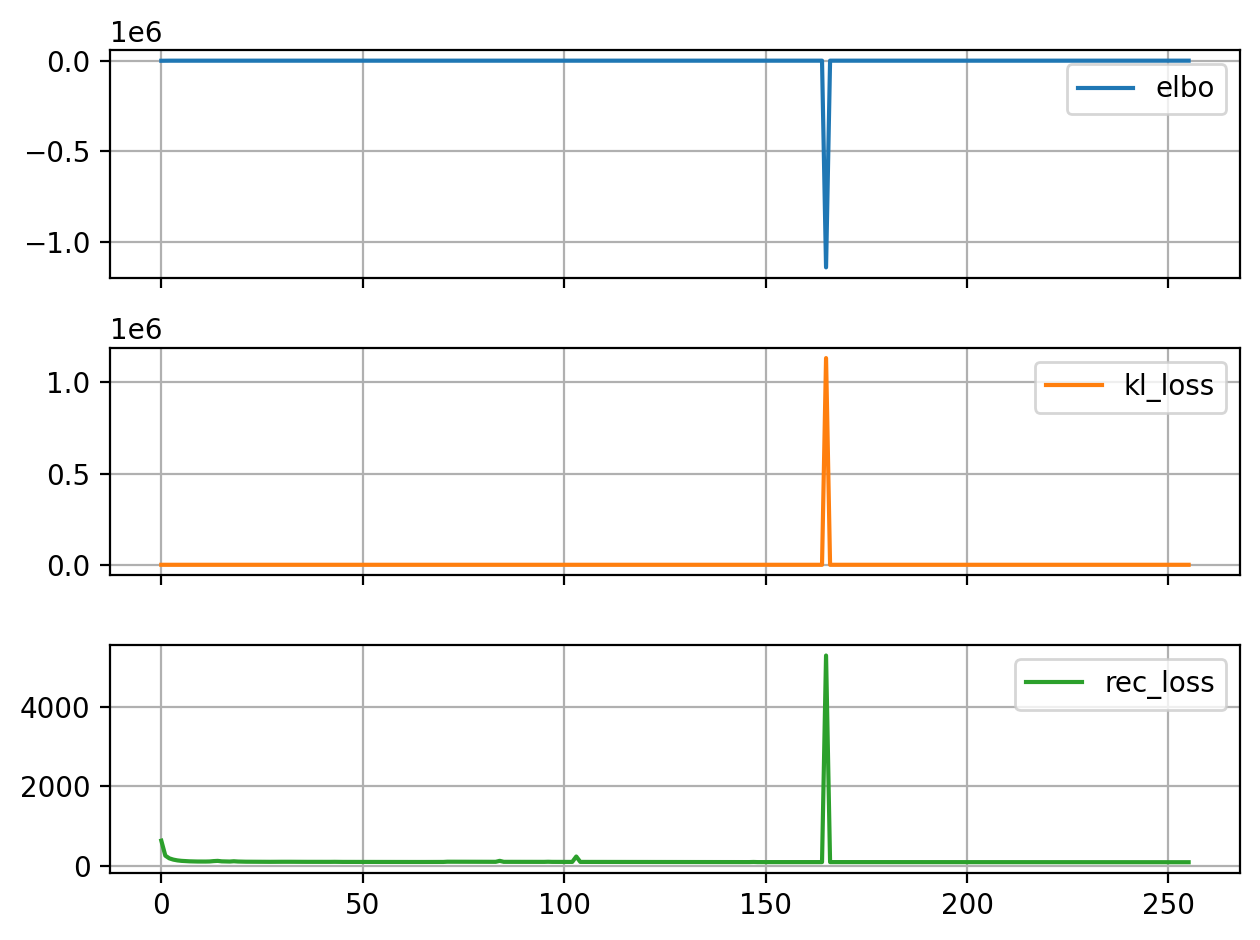

In [4]:
df = pd.DataFrame(model.stats['train'])
df.plot(subplots=True);

In [5]:
df[124:]

,elbo,kl_loss,rec_loss
124,-129.230469,39.689747,89.540710
125,-129.815277,40.335308,89.479973
126,-129.246033,39.967606,89.278412
127,-129.890228,40.847828,89.042412
128,-130.897705,41.835953,89.061760
...,...,...,...
251,-125.480095,40.636238,84.843864
252,-126.128792,41.487873,84.640930
253,-125.322838,40.653156,84.669693
254,-125.460419,40.759987,84.700432


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.04470086..1.0005524].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.02412613..1.0749828].


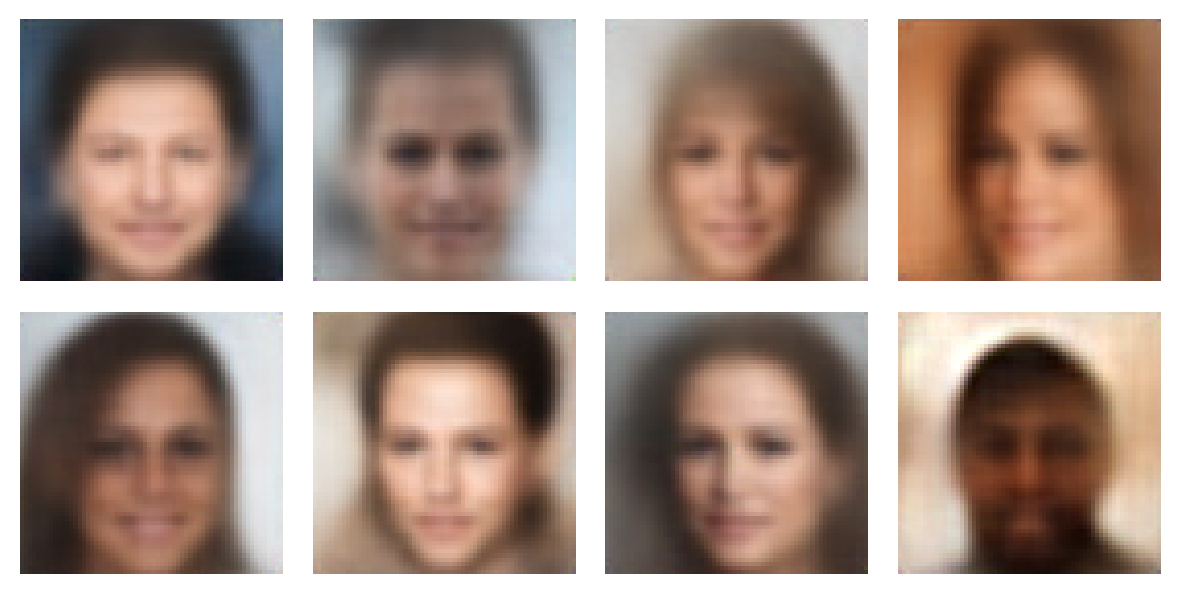

In [12]:
z = jax.random.normal(model.rngs(), (8, model.opts.dz))
x = model.decode(z)#.transpose(0, 2, 1, 3)
# plot x as an image grid
plt.figure(figsize=(6, 6))
for i in range(8):
    plt.subplot(4, 4, i+1)
    plt.imshow(x[i], cmap='gray')
    plt.axis('off')

# plt.imshow(x[0]., cmap='gray')
# plt.grid(False)